In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
print(x_train.shape[1:])

(8,)


In [6]:
# 这部分在搭建deep模型
# 函数式API 功能API,和之前不一样
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
# input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
# hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

# 假设wide模型和deep模型的输入是一样的；wide是input，deep是hidden2
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

# 然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)        

In [7]:
model.layers

In [8]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.5595 - val_loss: 0.8201
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6855 - val_loss: 0.7017
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6134 - val_loss: 0.6442
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5682 - val_loss: 0.5962
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5394 - val_loss: 0.5705
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5186 - val_loss: 0.5498
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5034 - val_loss: 0.5306
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4927 - val_loss: 0.5217
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4836 - val_loss: 0.5131
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4754 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3490 - val_loss: 0.3675
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3679
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3477 - val_loss: 0.3682
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3668
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3468 - val_loss: 0.3657
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.3654
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3650
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3452 - val_loss: 0.3644
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3448 - val_loss: 0.3645
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 

In [9]:
print(history.history)

{'loss': [1.5594602823257446, 0.6854694485664368, 0.6133867502212524, 0.5682456493377686, 0.5393685102462769, 0.5186140537261963, 0.5033698081970215, 0.49269723892211914, 0.4836363196372986, 0.47537761926651, 0.4680223762989044, 0.4613305926322937, 0.45572853088378906, 0.45021167397499084, 0.4448759853839874, 0.44049280881881714, 0.4363512694835663, 0.4322095811367035, 0.4293093979358673, 0.425673246383667, 0.4223578870296478, 0.4193507432937622, 0.41678109765052795, 0.4142339527606964, 0.41140487790107727, 0.40933045744895935, 0.406957745552063, 0.40496066212654114, 0.40285176038742065, 0.4012087881565094, 0.3991239666938782, 0.3973917067050934, 0.3955747187137604, 0.3940647542476654, 0.3921222686767578, 0.39060890674591064, 0.389028936624527, 0.3877010643482208, 0.3860410749912262, 0.38471588492393494, 0.38337892293930054, 0.38212019205093384, 0.38066279888153076, 0.37945008277893066, 0.3782002925872803, 0.3768730163574219, 0.3756481409072876, 0.3743237257003784, 0.37329211831092834,

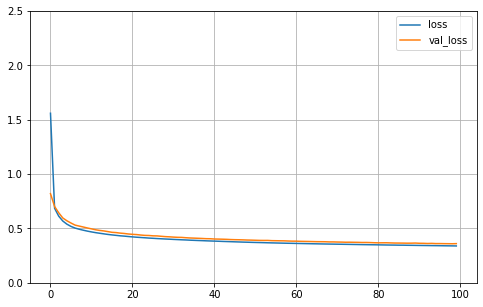

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
plot_learning_curves(history)

In [11]:
# 不是这个模型不好，而是搭建的比较简单
model.evaluate(x_test_scaled, y_test, verbose=0)

0.36366772651672363